Step 1: x = 0.0, y = 1.0000, f(x,y) = 1.0000, y_new = 1.5000
Step 2: x = 0.5, y = 1.5000, f(x,y) = 2.0000, y_new = 2.5000
Step 3: x = 1.0, y = 2.5000, f(x,y) = 3.5000, y_new = 4.2500
Step 4: x = 1.5, y = 4.2500, f(x,y) = 5.7500, y_new = 7.1250
Step 5: x = 2.0, y = 7.1250, f(x,y) = 9.1250, y_new = 11.6875
Step 6: x = 2.5, y = 11.6875, f(x,y) = 14.1875, y_new = 18.7812
Step 7: x = 3.0, y = 18.7812, f(x,y) = 21.7812, y_new = 29.6719
Step 8: x = 3.5, y = 29.6719, f(x,y) = 33.1719, y_new = 46.2578


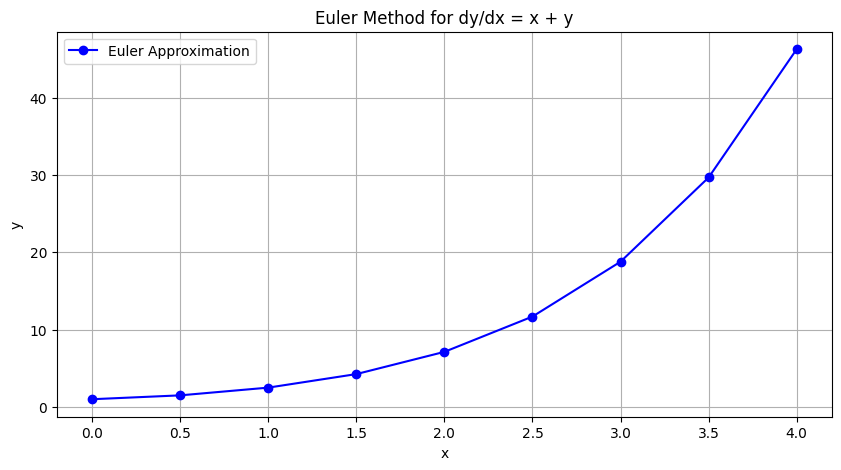

In [30]:
# FINAL EXAM NUMSOL
# NUMBER 1 
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x + y

x0 = 0
y0 = 1
h = 0.5  
x_end = 4

x_values = np.arange(x0, x_end + h, h)
y_values = [y0]

for i in range(1, len(x_values)):
    y_prev = y_values[-1]
    x_prev = x_values[i - 1]
    y_new = y_prev + h * f(x_prev, y_prev)
    y_values.append(y_new)
    print(f"Step {i}: x = {x_prev:.1f}, y = {y_prev:.4f}, f(x,y) = {f(x_prev, y_prev):.4f}, y_new = {y_new:.4f}")

plt.figure(figsize=(10, 5))
plt.plot(x_values, y_values, 'o-', label="Euler Approximation", color='blue')
plt.title("Euler Method for dy/dx = x + y")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

# DESCRIPTION
# - The objective is to numerically estimate y(2) using Heun’s Method, which is a second-order Runge-Kutta method (also called the improved Euler method).

Heun’s Method Steps:
Step 1: x = 0.0, y_predict = 2.4000, y_corrected = 2.4600
Step 2: x = 0.2, y_predict = 2.9920, y_corrected = 3.0652
Step 3: x = 0.4, y_predict = 3.7582, y_corrected = 3.8475
Step 4: x = 0.6, y_predict = 4.7371, y_corrected = 4.8460
Step 5: x = 0.8, y_predict = 5.9752, y_corrected = 6.1081
Step 6: x = 1.0, y_predict = 7.5297, y_corrected = 7.6919
Step 7: x = 1.2, y_predict = 9.4703, y_corrected = 9.6681
Step 8: x = 1.4, y_predict = 11.8818, y_corrected = 12.1231
Step 9: x = 1.6, y_predict = 14.8677, y_corrected = 15.1622
Step 10: x = 1.8, y_predict = 18.5547, y_corrected = 18.9139

Approximate value of y(2) ≈ 18.9139


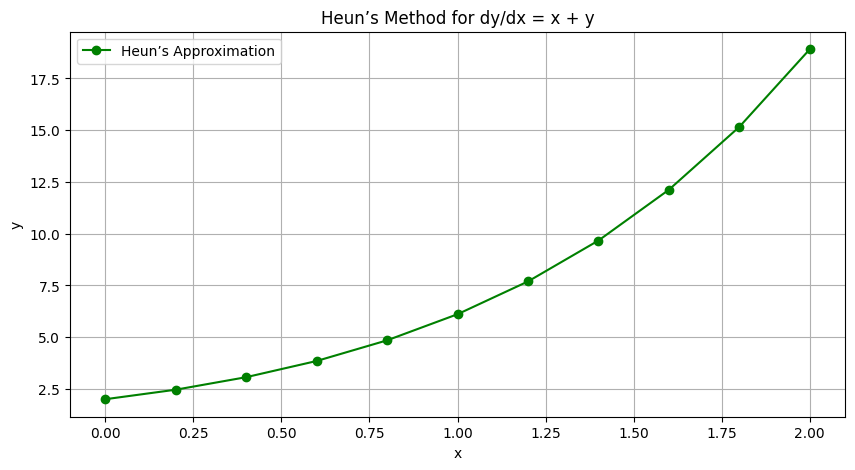

In [37]:
# FINAL EXAM NUMSOL
# NUMBER 2
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x + y

x0 = 0
y0 = 2
h = 0.2
x_target = 2

x_values = np.arange(x0, x_target + h, h)
y_values = [y0]

print("Heun’s Method Steps:")
for i in range(1, len(x_values)):
    x_prev = x_values[i - 1]
    y_prev = y_values[-1]

    y_predict = y_prev + h * f(x_prev, y_prev)

    slope_avg = (f(x_prev, y_prev) + f(x_prev + h, y_predict)) / 2
    y_corrected = y_prev + h * slope_avg

    y_values.append(y_corrected)

    print(f"Step {i}: x = {x_prev:.1f}, y_predict = {y_predict:.4f}, y_corrected = {y_corrected:.4f}")

print(f"\nApproximate value of y(2) ≈ {y_values[-1]:.4f}")

plt.figure(figsize=(10, 5))
plt.plot(x_values, y_values, 'o-', label="Heun’s Approximation", color='green')
plt.title("Heun’s Method for dy/dx = x + y")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

# DESCRIPTION
# - Heun’s method is an enhancement over the basic Euler method. It improves accuracy by averaging the slope at the beginning and predicted end of each interval.

Heun Method Approximation at x = 2: y ≈ 18.9139


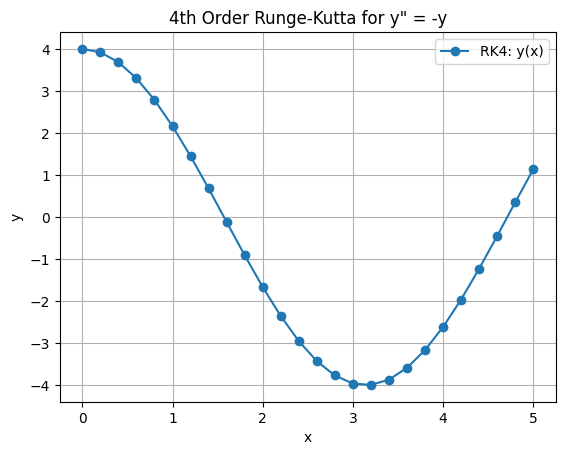

In [35]:
# FINAL EXAM NUMSOL
# NUMBER 3
import numpy as np
import matplotlib.pyplot as plt

def rk4_second_order(y0, dy0, x0, x_end, h):
    def f(x, y, dy):
        return -y  

    x_vals = np.arange(x0, x_end + h, h)
    y_vals = [y0]
    dy_vals = [dy0]

    y, dy = y0, dy0
    for x in x_vals[:-1]:
        k1 = h * dy
        l1 = h * f(x, y, dy)

        k2 = h * (dy + 0.5 * l1)
        l2 = h * f(x + 0.5 * h, y + 0.5 * k1, dy + 0.5 * l1)

        k3 = h * (dy + 0.5 * l2)
        l3 = h * f(x + 0.5 * h, y + 0.5 * k2, dy + 0.5 * l2)

        k4 = h * (dy + l3)
        l4 = h * f(x + h, y + k3, dy + l3)

        y += (k1 + 2 * k2 + 2 * k3 + k4) / 6
        dy += (l1 + 2 * l2 + 2 * l3 + l4) / 6

        y_vals.append(y)
        dy_vals.append(dy)

    return x_vals, y_vals

x1, y1 = euler_method(f1, y0=1, x0=0, x_end=4, h=0.5)
x2, y2 = heun_method(f1, y0=2, x0=0, x_end=2, h=0.2)
x3, y3 = rk4_second_order(y0=4, dy0=0, x0=0, x_end=5, h=0.2)

print(f"Heun Method Approximation at x = 2: y ≈ {y2[-1]:.4f}")

plt.plot(x3, y3, marker='o', label='RK4: y(x)')
plt.title('4th Order Runge-Kutta for y" = -y')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

# DESCRIPTION
# - You repeat the predictor-corrector steps for each interval of size  ℎ=0.2h=0.2 from 𝑥=0x=0 to 𝑥=2x=2. At the final step, you'll get an approximation of 𝑦(2)y(2).